In [2]:
#Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import re

In [3]:
# Carregando o dataset de filmes e creditcard

df_creditcard = pd.read_csv('./dados/creditcard.csv')
df_creditcard.info()

# Verificando se há valores ausentes 
print(df_creditcard.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
# Definindo as variáveis X e y

X = df_creditcard.drop(columns=['Class'])
y = df_creditcard['Class']

# Encontrado Erro na Normalização dos dados CreditCard Corregindo esse Erro

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [5]:
# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Criando o modelo de regressão logística
model_credit_card = LogisticRegression(max_iter=5000, solver= 'lbfgs').fit(X_train, y_train)

In [9]:
y_pred = model_credit_card.predict(X_test)
y_prob = model_credit_card.predict_proba(X_test)[:, 1]

# Avaliando o modelo
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Acurácia: {accuracy:.4f}")
print(f"Precisão: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


print('Relatorio de Classificação:')
print(classification_report(y_test, y_pred))

Acurácia: 0.9991
Precisão: 0.8636
Recall: 0.5816
F1-Score: 0.6951
Relatorio de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.58      0.70        98

    accuracy                           1.00     56962
   macro avg       0.93      0.79      0.85     56962
weighted avg       1.00      1.00      1.00     56962



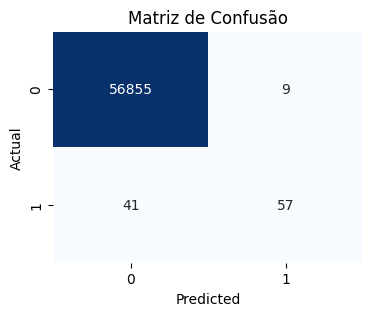

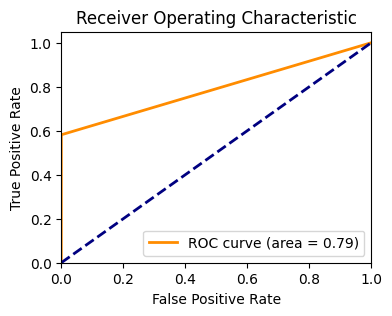

In [8]:
# Gerando a Matriz de Confusão

plt.figure(figsize=(4, 3))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusão')
plt.show()

# Gerando a Curva ROC
plt.figure(figsize=(4, 3))
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

### Conclusao do Modelo

Link do dataset: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

Relatório Final: Detecção de Fraudes com Regressão Logística
#### 1. Descrição do Problema e Dataset


Objetivo: Detectar transações fraudulentas em cartões de crédito usando Regressão Logística.

Dataset: Credit Card Fraud Detection (Kaggle), com 284.807 transações.

Variáveis: 28 features anônimas (V1-V28, resultantes de PCA), Time (tempo desde a primeira transação), Amount (valor), Class (0 = normal, 1 = fraude).

Desbalanceamento: Apenas 0.17% das transações são fraudes (classe minoritária).

#### 2. Preparação dos Dados


Divisão de Features: Separação entre variáveis preditoras (V1-V28, Time, Amount) e alvo (Class).

Normalização: Padronização das features com StandardScaler para evitar viés de escala.

Treino/Teste: Divisão em 80% treino e 20% teste (random_state=42 para reprodutibilidade).

#### 3. Resultados da Regressão Logística


Acurácia: 99.91% (alta devido ao desbalanceamento, mas enganosa).

Precisão: 86.36% (86% das previsões de fraude estão corretas).

Recall: 58.16% (apenas 58% das fraudes reais são detectadas).

F1-Score: 69.51% (equilíbrio moderado entre precisão e recall).

#### 4. Avaliação do Modelo

Matriz de Confusão:

56.864 verdadeiros negativos (transações normais corretamente identificadas).

57 verdadeiros positivos (fraudes detectadas).

41 falsos negativos (fraudes não detectadas – crítico).

Curva ROC (AUC = 0.78): Desempenho moderado, mas insuficiente para um problema crítico como fraude.

#### 5. Reflexões e Melhorias


Problemas Identificados:

Baixo recall (fraudes não detectadas são inaceitáveis na prática).

Métricas infladas pelo desbalanceamento (classe majoritária domina a acurácia).

 #### Sugestões de Melhoria:

Tratar Desbalanceamento: Técnicas como SMOTE, oversampling da classe minoritária ou undersampling da maioria.

Experimentar Outros Modelos: Algoritmos como Random Forest ou XGBoost, que lidam melhor com desbalanceamento.

Ajustar Hiperparâmetros: Otimizar thresholds de classificação para priorizar recall.

Métricas Prioritárias: Focar em AUC-PR (Precision-Recall) ou Recall puro, mais relevantes para fraudes.

Validação Cruzada Estratificada: Garantir representatividade das classes minoritárias durante a validação.

#### Conclusão: 
O modelo tem alta acurácia, mas falha em detectar fraudes críticas (baixo recall). A Regressão Logística não é ideal para esse cenário desbalanceado. São necessárias técnicas específicas para melhorar a detecção de fraudes e reduzir riscos operacionais.